# 21M.387 Fundamentals of Music Processing
## Lab3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Python Review

You should be comfortable with numpy vectors at this point. The following review may be helpful for numpy matrices.

You can create a matrix explicitly as shown below. You can also ask a matrix for its dimensions with `shape` (this is a property, not a function).

In [2]:
a = np.array( ((1,2,3,4), (5,6,7,8), (9,10,11,12)) )
print(a)
print('shape is', a.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
shape is (3, 4)


The dimensions of a matrix are always: Rows x Columns.

You can do matrix indexing and slicing very similarly to vector slicing.  
A colon by itself (`:`) selects an entire row or column.

In [3]:
print('a[1,2] = ')
print(a[1,2], '\n')

print('a[0:2,1:3] =')
print(a[0:2,1:3], '\n')

print('a[2, :] =')
print(a[2, :], '\n')

print('a[:, 2] =')
print(a[:, 2])
print('Note this presents itself as a vector, even though it is a column')

a[1,2] = 
7 

a[0:2,1:3] =
[[2 3]
 [6 7]] 

a[2, :] =
[ 9 10 11 12] 

a[:, 2] =
[ 3  7 11]
Note this presents itself as a vector, even though it is a column


You can set matrix elements by slicing as well. For example:

In [4]:
a = np.random.random((4,6))
print(a, '\n')

# set the corners to specific values
a[0,0] = 1
a[0,-1] = 2
a[-1,-1] = 3
a[-1,0] = 4
print(a, '\n')

# set an entire row or column
a[1,:] = 0
a[:,2] = 0

print(a, '\n')

[[2.43095386e-01 4.22439680e-02 7.81923125e-01 3.38315657e-01
  1.84335187e-01 3.81424835e-01]
 [2.88375242e-01 5.29439732e-01 9.07931396e-01 8.76590755e-01
  3.12970174e-01 9.18130343e-01]
 [5.23501040e-01 8.00334619e-01 8.10517710e-01 6.41105486e-01
  2.03738489e-02 4.59634995e-01]
 [8.07115632e-01 4.93705630e-01 9.95198094e-01 8.99443443e-01
  9.41247018e-04 5.56385837e-01]] 

[[1.00000000e+00 4.22439680e-02 7.81923125e-01 3.38315657e-01
  1.84335187e-01 2.00000000e+00]
 [2.88375242e-01 5.29439732e-01 9.07931396e-01 8.76590755e-01
  3.12970174e-01 9.18130343e-01]
 [5.23501040e-01 8.00334619e-01 8.10517710e-01 6.41105486e-01
  2.03738489e-02 4.59634995e-01]
 [4.00000000e+00 4.93705630e-01 9.95198094e-01 8.99443443e-01
  9.41247018e-04 3.00000000e+00]] 

[[1.00000000e+00 4.22439680e-02 0.00000000e+00 3.38315657e-01
  1.84335187e-01 2.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.23501040e-01 8.00334619e-01 0.00000000e+

## Exercise 1

- Load the small bit of audio below and listen to it.
- Plot it.
- Identify the approximate start location of the first note ($n_1$). Actually, make $n_1$ a bit later than the exact start, so that you are past the note's transient.
- Create $x$: a window of length $N=1024$ starting at $n_1$ of the audio.
- Plot $x$.
- Create $x_w$: $x$ multiplied by a Hann window of the same length (see `np.hanning()`).
- Plot $x_w$.

In [5]:
snd1 = fmp.load_wav("audio/piano_arpeg.wav")
fs = 22050
ipd.Audio(snd1, rate=fs)

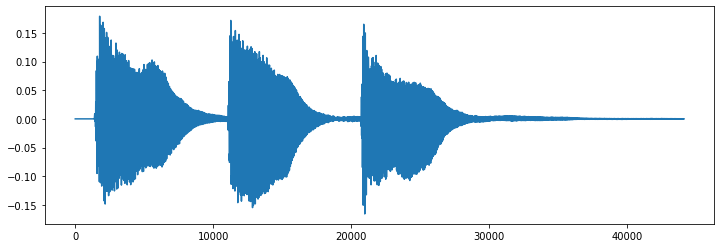

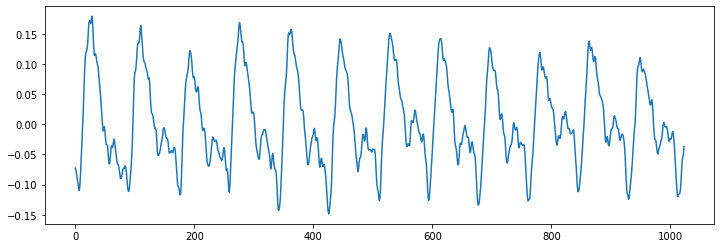

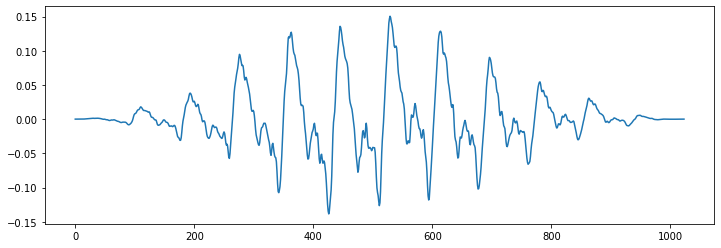

In [33]:
plt.plot(snd1)
plt.show()

n1 = 1740  # visual inspection
N = 1024
x = snd1[n1:n1+N]
plt.plot(x)
plt.show()

x_w = x * np.hanning(N)
plt.plot(x_w)
plt.show()

In [ ]:
connect_to_queue()

## Exercise 2

- Create  $\lvert X \lvert$, the magnitude of the first 1/2 of DFT of $x_w$ using  `np.fft.rfft` module.
- Plot it.
- Find the top 4 peaks of this signal (using `fmp.find_peaks`). You may need to play around with the optional `thresh` parameter to get only the highest 4 peaks of $\lvert X \lvert$.
- Plot the peaks
- Print out the bin numbers for these top 4 peaks.

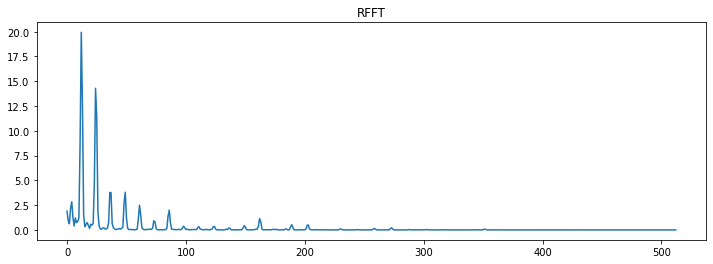

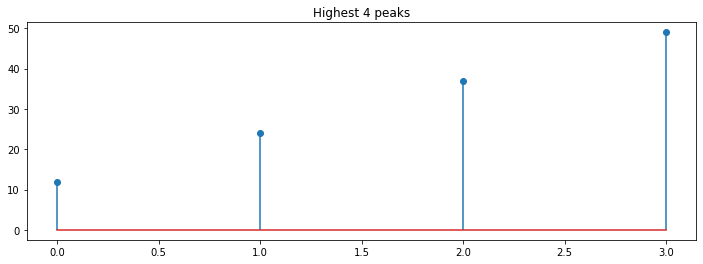

bins: [12 24 37 49]


In [78]:
X = np.abs(np.fft.rfft(x_w))

plt.plot(X)
plt.title('RFFT')
plt.show()

peaks = fmp.find_peaks(mag, thresh=0.15)
plt.stem(peaks)
plt.title('Highest 4 peaks')
plt.show()

print(f'bins: {peaks}')
#print([X[i] for i in peaks])

In [ ]:
connect_to_queue()

## Exercise 3a

- Write the function `bin_to_freq` which returns the frequency of a given FFT bin ($k$). This function should work with inputs that are scalars or vectors. (Hint: what other inputs does this function need?)
- Print the frequencies of the peaks of your DFT.

In [90]:
def bin_to_freq(k):
    if isinstance(k, (list, np.ndarray)):
        return [i * fs / N for i in k]
    return k * fs / N

# print peak frequencies
print(bin_to_freq(peaks[0])) # scalar
print(bin_to_freq(peaks))  # vector

258.3984375
[258.3984375, 516.796875, 796.728515625, 1055.126953125]


## Exercise 3b

- Write the function `freq_to_pitch` which returns the midi pitch (as a floating point value) from a given frequency. 
- Print the midi pitches of the peaks of your DFT.

Since that first note is an C4 played on piano, the first 4 pitches should correspond roughly to the first 4 harmonics: C4, C5, G5, C6.

How accurate are the pitches from your DFT analysis?

In [ ]:
def freq_to_pitch(f):
    pass

# print midi pitches

In [ ]:
connect_to_queue()

## Exercise 4

The frequency resolution of the DFT with the current $N$ is not that good. You can see that the pitches are not very accurate.

One way to help the accuracy is to increase $N$. In this exercise, lets increase $N$ by zero-padding the windowed signal $x_w$.

- Create a function `zpad` that zero-pads a vector to new length $N_{zp}$. You can use `np.concatenate` or `np.pad`.
- Repeat this process (Exercises 2 and 3) to arrive at a set of midi pitch values for $x_w$, while trying out increasing values of $N_{zp}$. It is generally good practice (but not mandatory) that $N_{zp}$ be a power of 2.
- Hint: it is probably easiest to write a function with $x$ and $N_{zp}$ as inputs that returns or prints out the MIDI pitches.

Do you observe the accuracy getting better?  
Do you get to a point where increasing $N_{zp}$ stops improving the accuracy of the results?


In [ ]:
def zpad(x, nzp):
    pass

# run Ex 3-4 with different values of nzp

In [ ]:
connect_to_queue()

## Exercise 5

Now load this bit of audio and listen to it.

In [ ]:
snd2 = fmp.load_wav("audio/piano_diad.wav")
fs = 22050
ipd.Audio(snd2, rate=fs)

There are two notes played at the same time. Get $N=1024$ samples from the start of this 2-note-chord. Use the technique of Exercise 4 to find the pitches in this audio recording. As above, increase the zero-padding to achieve more accuracy.

The pitches played by the piano are B2 and C#3 (MIDI 47 and 49). Yet these results don't seem very good. Why is that?

In [ ]:
connect_to_queue()

## Exercise 6

Let's increase $N$ in a different way - by using a larger initial window (grabbing a larger portion of the audio) instead of zero-padding.

Start with the same `snd2` of Exercise 5, but this time, slice off a larger and larger portion of the audio to create the initial DFT. Don't forget to apply the Hann window. Then, find the pitches corresponding to the DFT peaks.

- For what value of $N$ can you start to see two pitches? 
- For what value of $N$ do the pitches become accurate?


In [ ]:
connect_to_queue('checkoff')